## Submission 1 Pengembangan Machine Learing Dicoding
Labib Ammar Fadhali | labibfadhali12@gmail.com

**Konfigurasi Kaggle**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
upload=files.upload()

Saving kaggle.json to kaggle.json


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d rajatrc1705/youtube-videos-dataset

100% 646k/646k [00:00<00:00, 1.06MB/s]
100% 646k/646k [00:00<00:00, 1.06MB/s]


In [5]:
!unzip '/content/youtube-videos-dataset.zip' -d '/content'

Archive:  /content/youtube-videos-dataset.zip
  inflating: /content/youtube.csv    


**Membaca Dataset**

In [6]:
import pandas as pd
df=pd.read_csv('/content/youtube.csv')

In [7]:
df.shape

(3599, 4)

In [8]:
df.head()

,link,title,description,category
0,JLZlCZ0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel
1,i9E_Blai8vk,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel
2,r284c-q8oY,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel
3,Qmi-Xwq-ME,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel
4,_lcOX55Ef70,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel


In [9]:
df.category.value_counts()

travel       1156
art_music     947
food          903
history       593
Name: category, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3599 entries, 0 to 3598
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   link         3599 non-null   object
 1   title        3599 non-null   object
 2   description  3599 non-null   object
 3   category     3599 non-null   object
dtypes: object(4)
memory usage: 112.6+ KB


**Membersihkan Data**

In [11]:
df.duplicated().sum()

99

In [12]:
df.isna().sum()

link           0
title          0
description    0
category       0
dtype: int64

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
new_df=df.drop(columns='link',axis=1)
new_df

,title,description,category
0,Ep 1| Travelling through North East India | Of...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nT...,travel
1,Welcome to Bali | Travel Vlog | Priscilla Lee,Priscilla Lee\n45.6K subscribers\nSUBSCRIBE\n*...,travel
2,My Solo Trip to ALASKA | Cruising From Vancouv...,Allison Anderson\n588K subscribers\nSUBSCRIBE\...,travel
3,Traveling to the Happiest Country in the World!!,Yes Theory\n6.65M subscribers\nSUBSCRIBE\n*BLA...,travel
4,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...,Tanya Khanijow\n671K subscribers\nSUBSCRIBE\nH...,travel
...,...,...,...
3594,21st Century Challenges: Crash Course European...,CrashCourse\n12.4M subscribers\nSUBSCRIBE\nThe...,history
3595,EU DataViz webinar - Barnaby Skinner - How to ...,Publications Office of the European Union\n3.2...,history
3596,Stone Age Scandinavia: First People In the Nor...,History Time\n619K subscribers\nSUBSCRIBE\n- W...,history
3597,AP European History - Interwar Period: Paris P...,Mr. Raymond's Civics and Social Studies Academ...,history


In [15]:
new_df['text'] = new_df['title'] + ' ' + new_df['description']
new_df=new_df.drop(columns=['title','description'],axis=1)
new_df

,category,text
0,travel,Ep 1| Travelling through North East India | Of...
1,travel,Welcome to Bali | Travel Vlog | Priscilla Lee ...
2,travel,My Solo Trip to ALASKA | Cruising From Vancouv...
3,travel,Traveling to the Happiest Country in the World...
4,travel,Solo in Paro Bhutan | Tiger's Nest visit | Bhu...
...,...,...
3594,history,21st Century Challenges: Crash Course European...
3595,history,EU DataViz webinar - Barnaby Skinner - How to ...
3596,history,Stone Age Scandinavia: First People In the Nor...
3597,history,AP European History - Interwar Period: Paris P...


In [16]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
nltk.download('stopwords')
nltk.download('punkt')

def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def remove_url_and_brackets(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)
    text = re.sub(r'\([^)]*\)', '', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\{.*?\}', '', text)
    return text

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def clean_text(text):
  text=remove_html_tags(text)
  text=remove_url_and_brackets(text)
  text=remove_stopwords(text)
  return text

new_df['text'] = new_df['text'].apply(clean_text)
new_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-16-412a6eb42014>:10: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


,category,text
0,travel,Ep 1| Travelling North East India | Arunachal ...
1,travel,Welcome Bali | Travel Vlog | Priscilla Lee Pri...
2,travel,Solo Trip ALASKA | Cruising Vancouver Anchorag...
3,travel,Traveling Happiest Country World ! ! Yes Theor...
4,travel,Solo Paro Bhutan | Tiger 's Nest visit | Bhuta...
...,...,...
3594,history,21st Century Challenges : Crash Course Europea...
3595,history,EU DataViz webinar - Barnaby Skinner - make da...
3596,history,Stone Age Scandinavia : First People North His...
3597,history,AP European History - Interwar Period : Paris ...


In [17]:
category=pd.get_dummies(new_df.category)
new_df=pd.concat([new_df,category],axis=1)
new_df=new_df.drop(columns='category',axis=1)
new_df

,text,art_music,food,history,travel
0,Ep 1| Travelling North East India | Arunachal ...,0,0,0,1
1,Welcome Bali | Travel Vlog | Priscilla Lee Pri...,0,0,0,1
2,Solo Trip ALASKA | Cruising Vancouver Anchorag...,0,0,0,1
3,Traveling Happiest Country World ! ! Yes Theor...,0,0,0,1
4,Solo Paro Bhutan | Tiger 's Nest visit | Bhuta...,0,0,0,1
...,...,...,...,...,...
3594,21st Century Challenges : Crash Course Europea...,0,0,1,0
3595,EU DataViz webinar - Barnaby Skinner - make da...,0,0,1,0
3596,Stone Age Scandinavia : First People North His...,0,0,1,0
3597,AP European History - Interwar Period : Paris ...,0,0,1,0


**Membagi Dataset menjadi 20% Validation Set**

In [18]:
text=new_df['text'].values
label=new_df[['art_music','food','history','travel']].values

In [19]:
from sklearn.model_selection import train_test_split

text_train,text_test,label_train,label_test=train_test_split(text,label,test_size=0.2)

print(len(text_train))
print(len(text_test))

2800
700


**Menggunakan Tokenizer**

In [26]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token='<oov>')
tokenizer.fit_on_texts(text_train)

sekuens_train = tokenizer.texts_to_sequences(text_train)
sekuens_test = tokenizer.texts_to_sequences(text_test)

padded_train=pad_sequences(sekuens_train,padding='post',maxlen=75,truncating='post')
padded_test=pad_sequences(sekuens_test,padding='post',maxlen=75,truncating='post')

**Menggunakan Model Sequential, Menggunakan Embedding dan LSTM**

In [27]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

**Callback untuk menghentikan train jika accuracy dan val_accuracy lebih dari 90%**

In [28]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.9) and (logs.get('val_accuracy')>0.9):
      print('\n accuracy and val_accuracy > 90%')
      self.model.stop_training=True
callbacks=myCallback()

**Melatih Model**

In [29]:
history=model.fit(padded_train,
                  label_train,
                  epochs=20,
                  validation_data=(padded_test,label_test),
                  verbose=2,
                  callbacks=[callbacks])

Epoch 1/20
88/88 - 9s - loss: 1.2786 - accuracy: 0.3568 - val_loss: 1.0832 - val_accuracy: 0.3714 - 9s/epoch - 100ms/step
Epoch 2/20
88/88 - 4s - loss: 0.9967 - accuracy: 0.4446 - val_loss: 1.0110 - val_accuracy: 0.4957 - 4s/epoch - 51ms/step
Epoch 3/20
88/88 - 4s - loss: 0.9831 - accuracy: 0.4786 - val_loss: 1.0309 - val_accuracy: 0.3943 - 4s/epoch - 49ms/step
Epoch 4/20
88/88 - 6s - loss: 0.9627 - accuracy: 0.4664 - val_loss: 0.9618 - val_accuracy: 0.4071 - 6s/epoch - 66ms/step
Epoch 5/20
88/88 - 4s - loss: 0.9990 - accuracy: 0.4875 - val_loss: 0.9187 - val_accuracy: 0.5200 - 4s/epoch - 49ms/step
Epoch 6/20
88/88 - 4s - loss: 0.9261 - accuracy: 0.5061 - val_loss: 0.9167 - val_accuracy: 0.5143 - 4s/epoch - 49ms/step
Epoch 7/20
88/88 - 6s - loss: 0.7636 - accuracy: 0.6329 - val_loss: 0.5832 - val_accuracy: 0.6800 - 6s/epoch - 66ms/step
Epoch 8/20
88/88 - 4s - loss: 0.5179 - accuracy: 0.7275 - val_loss: 0.5780 - val_accuracy: 0.7343 - 4s/epoch - 49ms/step
Epoch 9/20
88/88 - 5s - loss: 0

**Membuat Plot Loss dan Accuracy**

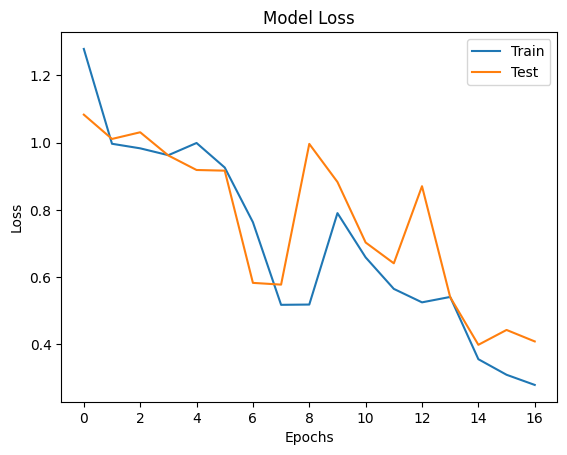

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train','Test'],loc='upper right')
plt.show()

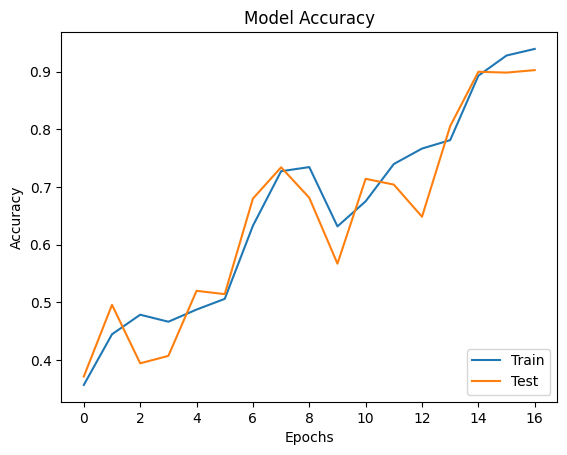

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Test'],loc='lower right')
plt.show()